# 1 - Title, Name and References

CSIS 3290 – 002 – Project 2    

Name: Luciana Motta Coelho

Student ID: 300372221

References:

                Lecture Demo Codes

                https://pandas.pydata.org/
                
                https://scikit-learn.org/
                
                insightlab.ufc.br
                
                https://medium.com/data-hackers/como-manipular-datetime-no-python-578f07b72920
                
                https://docs.python.org/pt-br/3/library/datetime.html
                
                https://www.turing.com/kb/building-ml-pipeline-in-python-with-scikit-learn
                
                https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
                
                https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
                
                https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html


# 2 - About Dataset

Download from: https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes

The Motor Vehicle Collisions data tables contain information from all police-reported motor vehicle collisions in NYC from January 2016 until December 2022. Each row represents a crash event.

Every traffic crash is electronically registered in a system called Finest Online Records Management System (FORMS), and one dataset is saved in Department’s crime data warehouse, which can be used in the future for safety analyses.

To construct this machine learning, I have extracted a sample with records from January 2021 until December 2022.

Important information: The dataset can register information about car crashes involving until 5 vehicles in each crash events.

# 3 - About the problem

The main objective is to identify patterns in the collision crashes dataset. For example, if a determined car type has more chance of being involved in a car crash, in which neighborhoods have more collisions? Is there a relation between the hour and the car crash happening, or in which situation can more people be injured?

These insights can be used to produce strategies to reduce the number of accidents.

## 3.1 - Summary of steps

Basic steps followed to implement the machine learning:

    1 - Load dataset;
    2 - Clean data;
    3 - Drop irrelevant information;
    4 - Make some data transformation;
    5 - Select features;
    6 - Random Forest regression;
    7 - Make predictions.
    

# 4 - Data wrangling and transformation

## 4.1 - Load the Python Library

In [1]:
#Loading Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 4.2 - Read the data

In [3]:
# Loading the file
df = pd.read_csv('Dataset/Motor_Vehicle_Collisions.csv', low_memory=False)

In [4]:
# Show dataset information
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/01/2021,20:00,NaN,NaN,40.83398,-73.826350,"(40.83398, -73.82635)",BRUCKNER EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4491746.0,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1,01/01/2021,5:28,NaN,NaN,40.68730,-73.973656,"(40.6873, -73.973656)",LAFAYETTE AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4441905.0,Sedan,Sedan,NaN,NaN,NaN
2,01/01/2021,6:00,NaN,NaN,NaN,NaN,NaN,WEST SHORE EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4382769.0,Sedan,NaN,NaN,NaN,NaN
3,01/01/2021,19:30,BRONX,10463.0,40.88270,-73.892730,"(40.8827, -73.89273)",SEDGWICK AVENUE,VANCORTLANDT AVENUE WEST,NaN,...,NaN,NaN,NaN,NaN,4380949.0,NaN,NaN,NaN,NaN,NaN
4,01/01/2021,7:40,BROOKLYN,11218.0,40.63791,-73.978640,"(40.63791, -73.97864)",CORTELYOU ROAD,MC DONALD AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4380940.0,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN


In [5]:
#Display columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71212 entries, 0 to 71211
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     71211 non-null  object 
 1   CRASH TIME                     71211 non-null  object 
 2   BOROUGH                        46761 non-null  object 
 3   ZIP CODE                       46752 non-null  float64
 4   LATITUDE                       65373 non-null  float64
 5   LONGITUDE                      65373 non-null  float64
 6   LOCATION                       65373 non-null  object 
 7   ON STREET NAME                 51714 non-null  object 
 8   CROSS STREET NAME              32854 non-null  object 
 9   OFF STREET NAME                19497 non-null  object 
 10  NUMBER OF PERSONS INJURED      71211 non-null  float64
 11  NUMBER OF PERSONS KILLED       71211 non-null  float64
 12  NUMBER OF PEDESTRIANS INJURED  71211 non-null 

## 4.3 - Cleaning Data


In [6]:
#Checking null values
df.isna().sum()

CRASH DATE                           1
CRASH TIME                           1
BOROUGH                          24451
ZIP CODE                         24460
LATITUDE                          5839
LONGITUDE                         5839
LOCATION                          5839
ON STREET NAME                   19498
CROSS STREET NAME                38358
OFF STREET NAME                  51715
NUMBER OF PERSONS INJURED            1
NUMBER OF PERSONS KILLED             1
NUMBER OF PEDESTRIANS INJURED        1
NUMBER OF PEDESTRIANS KILLED         1
NUMBER OF CYCLIST INJURED            1
NUMBER OF CYCLIST KILLED             1
NUMBER OF MOTORIST INJURED           1
NUMBER OF MOTORIST KILLED            1
CONTRIBUTING FACTOR VEHICLE 1      398
CONTRIBUTING FACTOR VEHICLE 2    16476
CONTRIBUTING FACTOR VEHICLE 3    64051
CONTRIBUTING FACTOR VEHICLE 4    69241
CONTRIBUTING FACTOR VEHICLE 5    70596
COLLISION_ID                         1
VEHICLE TYPE CODE 1                906
VEHICLE TYPE CODE 2      

In [7]:
#Drop columnns that all data are NaN
df.dropna(axis=1,how='all',inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71212 entries, 0 to 71211
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     71211 non-null  object 
 1   CRASH TIME                     71211 non-null  object 
 2   BOROUGH                        46761 non-null  object 
 3   ZIP CODE                       46752 non-null  float64
 4   LATITUDE                       65373 non-null  float64
 5   LONGITUDE                      65373 non-null  float64
 6   LOCATION                       65373 non-null  object 
 7   ON STREET NAME                 51714 non-null  object 
 8   CROSS STREET NAME              32854 non-null  object 
 9   OFF STREET NAME                19497 non-null  object 
 10  NUMBER OF PERSONS INJURED      71211 non-null  float64
 11  NUMBER OF PERSONS KILLED       71211 non-null  float64
 12  NUMBER OF PEDESTRIANS INJURED  71211 non-null 

In [8]:
#Drop rows where all data missing
df.dropna(axis=0,how='all',inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71211 entries, 0 to 71210
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     71211 non-null  object 
 1   CRASH TIME                     71211 non-null  object 
 2   BOROUGH                        46761 non-null  object 
 3   ZIP CODE                       46752 non-null  float64
 4   LATITUDE                       65373 non-null  float64
 5   LONGITUDE                      65373 non-null  float64
 6   LOCATION                       65373 non-null  object 
 7   ON STREET NAME                 51714 non-null  object 
 8   CROSS STREET NAME              32854 non-null  object 
 9   OFF STREET NAME                19497 non-null  object 
 10  NUMBER OF PERSONS INJURED      71211 non-null  float64
 11  NUMBER OF PERSONS KILLED       71211 non-null  float64
 12  NUMBER OF PEDESTRIANS INJURED  71211 non-null 

In [9]:
# Registers with ZipCode and Contributing Factor Vehicle 1 equal null, are not representative
df = df.dropna(subset=['ZIP CODE','CONTRIBUTING FACTOR VEHICLE 1'])

In [10]:
# Deleting unrepresentative columns. ZIP CODE will be used to identify the crash's location, 
# so the others information are unnecessary.

colsdrop = ['ON STREET NAME','CROSS STREET NAME','OFF STREET NAME','BOROUGH','LATITUDE', 'LONGITUDE','LOCATION','COLLISION_ID']

df = df.drop(colsdrop, axis=1)

In [11]:
# We are using Zip Code to show crash's location. Registers without ZIP CODE are not important
df.dropna(subset=['ZIP CODE'],inplace=True)

df = df[df['ZIP CODE'] != '     ']


In [12]:
#Verify if still have null values in Dataset
df.isna().sum()
#Fill with 0 in case of null
df = df.fillna(0)

In [13]:
#Reset index

df.reset_index(drop=True, inplace=True)

In [14]:
# Visualizing after modifications

df.head()

,CRASH DATE,CRASH TIME,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/01/2021,7:40,11218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Unspecified,Unspecified,0,0,0,Station Wagon/Sport Utility Vehicle,Taxi,0,0,0
1,01/01/2021,4:51,11212.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Other Vehicular,Other Vehicular,0,0,0,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
2,01/01/2021,16:14,11237.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Passing Too Closely,Unspecified,0,0,0,Sedan,0,0,0,0
3,01/01/2021,12:00,11208.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Unspecified,0,0,0,0,Station Wagon/Sport Utility Vehicle,0,0,0,0
4,01/01/2021,3:00,11413.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Unspecified,0,0,0,0,Sedan,0,0,0,0


In [15]:
# look after modifications

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46441 entries, 0 to 46440
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     46441 non-null  object 
 1   CRASH TIME                     46441 non-null  object 
 2   ZIP CODE                       46441 non-null  float64
 3   NUMBER OF PERSONS INJURED      46441 non-null  float64
 4   NUMBER OF PERSONS KILLED       46441 non-null  float64
 5   NUMBER OF PEDESTRIANS INJURED  46441 non-null  float64
 6   NUMBER OF PEDESTRIANS KILLED   46441 non-null  float64
 7   NUMBER OF CYCLIST INJURED      46441 non-null  float64
 8   NUMBER OF CYCLIST KILLED       46441 non-null  float64
 9   NUMBER OF MOTORIST INJURED     46441 non-null  float64
 10  NUMBER OF MOTORIST KILLED      46441 non-null  float64
 11  CONTRIBUTING FACTOR VEHICLE 1  46441 non-null  object 
 12  CONTRIBUTING FACTOR VEHICLE 2  46441 non-null 

## 5.2 - Transforming Data

## 5.2.1 - Reducing categorical values

In [16]:
# If Contributing Factor Vehicle 1, is equal to Unspecified,1 or 80, this register is not representative in this model
df = df.loc[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']
df = df.loc[df['CONTRIBUTING FACTOR VEHICLE 1'] != '1']
df = df.loc[df['CONTRIBUTING FACTOR VEHICLE 1'] != '0']
df = df.loc[df['CONTRIBUTING FACTOR VEHICLE 1'] != '80']

In [17]:
# Verifing number of diferents categories in the column 'CONTRIBUTING FACTOR VEHICLE 1'
df[['CONTRIBUTING FACTOR VEHICLE 1']].value_counts().sort_values(ascending=False)

CONTRIBUTING FACTOR VEHICLE 1                        
Driver Inattention/Distraction                           11214
Failure to Yield Right-of-Way                             3441
Passing or Lane Usage Improper                            1911
Following Too Closely                                     1906
Passing Too Closely                                       1902
Backing Unsafely                                          1759
Unsafe Speed                                              1435
Traffic Control Disregarded                               1417
Other Vehicular                                           1225
Turning Improperly                                        1146
Driver Inexperience                                        863
Alcohol Involvement                                        791
Unsafe Lane Changing                                       530
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion      463
Reaction to Uninvolved Vehicle                             419
V

OBS.: Initially, the idea was to group the "Contributing Factor" into fewer categories to create dummies a posteriori.
During the implementation, it was observed that the dataset would be extensive, so I decided to group it into fewer categories
to after encoding these columns.



In [18]:
# Call function to aggregate categories in the columns "CONTRIBUTING FACTOR VEHICLE".
%run Function/Functions_LCo72221.ipynb

dict1 = map_contributing_factors()

In [19]:
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].map(dict1)
df['CONTRIBUTING FACTOR VEHICLE 2'] = df['CONTRIBUTING FACTOR VEHICLE 2'].map(dict1)
df['CONTRIBUTING FACTOR VEHICLE 3'] = df['CONTRIBUTING FACTOR VEHICLE 3'].map(dict1)
df['CONTRIBUTING FACTOR VEHICLE 4'] = df['CONTRIBUTING FACTOR VEHICLE 4'].map(dict1)
df['CONTRIBUTING FACTOR VEHICLE 5'] = df['CONTRIBUTING FACTOR VEHICLE 5'].map(dict1)

In [20]:
# Encoding the columns Contributing Factor Vehicle. 

label_encoder = LabelEncoder()

df['CONTRIBUTING FACTOR VEHICLE 1'] = label_encoder.fit_transform(df['CONTRIBUTING FACTOR VEHICLE 1'])
df['CONTRIBUTING FACTOR VEHICLE 2'] = label_encoder.fit_transform(df['CONTRIBUTING FACTOR VEHICLE 2'])
df['CONTRIBUTING FACTOR VEHICLE 3'] = label_encoder.fit_transform(df['CONTRIBUTING FACTOR VEHICLE 3'])
df['CONTRIBUTING FACTOR VEHICLE 4'] = label_encoder.fit_transform(df['CONTRIBUTING FACTOR VEHICLE 4'])
df['CONTRIBUTING FACTOR VEHICLE 5'] = label_encoder.fit_transform(df['CONTRIBUTING FACTOR VEHICLE 5'])



In [21]:
df[['VEHICLE TYPE CODE 1']].value_counts().sort_values(ascending=False)

VEHICLE TYPE CODE 1                
Sedan                                  15368
Station Wagon/Sport Utility Vehicle    11700
Taxi                                     949
Pick-up Truck                            688
Bus                                      660
                                       ...  
AMBULANE                                   1
VAN/TRUCK                                  1
VAN TRUCK                                  1
Unk                                        1
Motorized                                  1
Length: 187, dtype: int64

Since there are more than 100 Type codes and they are not padronized, I grouped the major 32 model vehicles in smaller groups.
To complete this action, I created a function.

In [22]:
dict2 = map_type_code()


df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].map(dict2)
df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].map(dict2)
df['VEHICLE TYPE CODE 3'] = df['VEHICLE TYPE CODE 3'].map(dict2)
df['VEHICLE TYPE CODE 4'] = df['VEHICLE TYPE CODE 4'].map(dict2)
df['VEHICLE TYPE CODE 5'] = df['VEHICLE TYPE CODE 5'].map(dict2)

In [23]:
# Instead of creating dummies I prefered to encoding the columns "VEHICLE TYPE CODE". 
#Create dummies would turned the dataset extensive

df['VEHICLE TYPE CODE 1'] = label_encoder.fit_transform(df['VEHICLE TYPE CODE 1'])
df['VEHICLE TYPE CODE 2'] = label_encoder.fit_transform(df['VEHICLE TYPE CODE 2'])
df['VEHICLE TYPE CODE 3'] = label_encoder.fit_transform(df['VEHICLE TYPE CODE 3'])
df['VEHICLE TYPE CODE 4'] = label_encoder.fit_transform(df['VEHICLE TYPE CODE 4'])
df['VEHICLE TYPE CODE 5'] = label_encoder.fit_transform(df['VEHICLE TYPE CODE 5'])

## 5.2.2 - Transforming colums Crash Date and Crash Time in datetime

In [24]:
# Columns "Crash Date" and "Crash Time" are object type. I will transform them in Date and Time, respectively.

df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y')

df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M')


In [25]:
#Column ZIP CODE is object type. Transforming in numeric to be able to work with it. 
df['ZIP CODE'] = pd.to_numeric(df['ZIP CODE'])

In [26]:
# Visualizing after modifications
df.head()

,CRASH DATE,CRASH TIME,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1,2021-01-01,1900-01-01 04:51:00,11212.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,4,6,4,2,3,3,9,9,7
2,2021-01-01,1900-01-01 16:14:00,11237.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,10,6,4,2,3,9,9,9,7
5,2021-01-01,1900-01-01 06:15:00,11222.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,10,6,4,2,3,9,9,9,7
7,2021-01-01,1900-01-01 17:25:00,10019.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4,10,6,4,2,3,6,9,9,7
8,2021-01-01,1900-01-01 00:25:00,11105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,10,6,4,2,3,9,9,9,7


In [27]:
#reset index 
df = df.reset_index(drop=True)


In [28]:
# Visualizing after modifications
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33285 entries, 0 to 33284
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CRASH DATE                     33285 non-null  datetime64[ns]
 1   CRASH TIME                     33285 non-null  datetime64[ns]
 2   ZIP CODE                       33285 non-null  float64       
 3   NUMBER OF PERSONS INJURED      33285 non-null  float64       
 4   NUMBER OF PERSONS KILLED       33285 non-null  float64       
 5   NUMBER OF PEDESTRIANS INJURED  33285 non-null  float64       
 6   NUMBER OF PEDESTRIANS KILLED   33285 non-null  float64       
 7   NUMBER OF CYCLIST INJURED      33285 non-null  float64       
 8   NUMBER OF CYCLIST KILLED       33285 non-null  float64       
 9   NUMBER OF MOTORIST INJURED     33285 non-null  float64       
 10  NUMBER OF MOTORIST KILLED      33285 non-null  float64       
 11  CONTRIBUTING FA

# 6 - Exploratory Data Analysis - EDA

## 6.1 - Some statistics


In [29]:
df.describe()

,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
count,33285.000000,33285.000000,33285.000000,33285.000000,33285.000000,33285.000000,33285.000000,33285.000000,33285.000000,33285.00000,33285.000000,33285.00000,33285.000000,33285.000000,33285.000000,33285.000000,33285.00000,33285.000000,33285.000000
mean,10891.049902,0.490461,0.001923,0.082620,0.000691,0.057083,0.000090,0.324440,0.001021,3.33135,8.939823,5.97945,3.997597,1.999459,3.446207,4.936999,8.43458,8.826108,6.960733
std,532.210265,0.784958,0.047113,0.290394,0.027398,0.234836,0.009493,0.749862,0.035508,1.21391,2.660193,0.28702,0.072263,0.027944,1.703938,3.071314,1.75626,1.008519,0.395477
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,10456.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000,10.000000,6.00000,4.000000,2.000000,3.000000,3.000000,9.00000,9.000000,7.000000
50%,11209.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000,10.000000,6.00000,4.000000,2.000000,3.000000,3.000000,9.00000,9.000000,7.000000
75%,11355.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000,10.000000,6.00000,4.000000,2.000000,3.000000,9.000000,9.00000,9.000000,7.000000
max,11697.000000,18.000000,3.000000,5.000000,2.000000,2.000000,1.000000,18.000000,3.000000,10.00000,10.000000,6.00000,4.000000,2.000000,9.000000,9.000000,9.00000,9.000000,7.000000


## 6.2 - Correlation features


In [30]:
df.corr(numeric_only=True)

,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
ZIP CODE,1.000000,0.008722,-0.010127,-0.030220,-0.010420,-0.055402,-0.010324,0.037384,-0.000872,-0.024316,0.059887,0.019066,0.010488,0.006812,-0.052497,-0.016007,-0.050802,-0.035429,-0.025219
NUMBER OF PERSONS INJURED,0.008722,1.000000,0.030556,0.238597,0.009387,0.175069,-0.005932,0.871842,0.036999,0.004058,-0.097373,-0.046077,-0.022650,-0.005714,-0.030265,-0.096177,-0.090586,-0.069232,-0.055840
NUMBER OF PERSONS KILLED,-0.010127,0.030556,1.000000,-0.005024,0.580878,-0.009921,0.201136,0.038471,0.753136,0.008297,0.004999,0.002922,0.001357,0.000790,0.002411,0.014334,-0.002111,-0.013830,-0.015298
NUMBER OF PEDESTRIANS INJURED,-0.030220,0.238597,-0.005024,1.000000,0.004153,-0.064313,-0.002701,-0.108890,-0.008185,-0.010842,0.108490,0.018208,0.009463,0.005506,0.072069,0.352603,0.079287,0.040953,0.019878
NUMBER OF PEDESTRIANS KILLED,-0.010420,0.009387,0.580878,0.004153,1.000000,-0.006131,-0.000239,0.011023,-0.000726,0.008473,0.006754,0.001806,0.000839,0.000488,0.010772,0.025868,0.000627,-0.008699,-0.019679
NUMBER OF CYCLIST INJURED,-0.055402,0.175069,-0.009921,-0.064313,-0.006131,1.000000,-0.002308,-0.098008,-0.006993,0.041887,-0.092323,0.004032,0.004544,0.004704,-0.117040,-0.277649,0.053346,0.032526,0.018313
NUMBER OF CYCLIST KILLED,-0.010324,-0.005932,0.201136,-0.002701,-0.000239,-0.002308,1.000000,-0.004108,-0.000273,0.007837,0.003784,0.000680,0.000316,0.000184,-0.008058,-0.002897,-0.007755,-0.026605,0.000943
NUMBER OF MOTORIST INJURED,0.037384,0.871842,0.038471,-0.108890,0.011023,-0.098008,-0.004108,1.000000,0.045100,-0.002451,-0.099243,-0.058362,-0.029965,-0.010266,-0.009490,-0.129406,-0.152213,-0.104372,-0.075372
NUMBER OF MOTORIST KILLED,-0.000872,0.036999,0.753136,-0.008185,-0.000726,-0.006993,-0.000273,0.045100,1.000000,0.000512,0.001287,0.002060,0.000957,0.000557,0.002398,-0.002165,-0.002301,-0.005107,-0.005702
CONTRIBUTING FACTOR VEHICLE 1,-0.024316,0.004058,0.008297,-0.010842,0.008473,0.041887,0.007837,-0.002451,0.000512,1.000000,-0.058134,-0.051597,-0.019006,-0.012432,-0.008355,-0.026562,-0.058695,-0.053429,-0.045431


<Axes: >

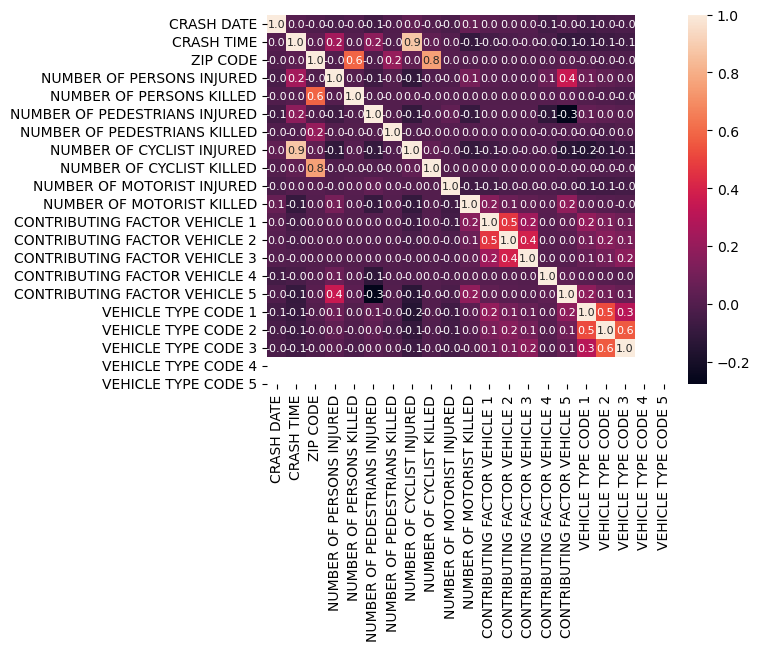

In [31]:
# Plot the heatmap of the correlation
sns.heatmap(df.corr(numeric_only=True),
            cbar=True,
            annot=True,
            fmt = '.1f',
            annot_kws={'size' : 8},
            yticklabels=df.columns,
            xticklabels=df.columns
           )


Observations about heatmap:


1 - There is a high correlation between all columns "Contributing Factor Vehicle".

2 - There is a high correlation between all columns "Vehicle Type Code".

3 - There is a high correlation between "Zip Code" and "Number of persons killed".

4 - There is a high correlation between "Zip Code" and "Number of cyclist killed".

5 - There is a high correlation between "Crash Time" and "Number of cyclist killed".

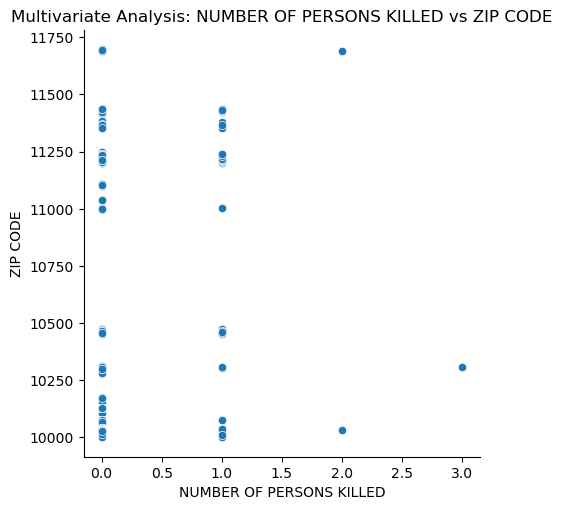

In [32]:
#Display a multivariate analysis plot for NUMBER OF CYCLIST KILLED' vs 'CONTRIBUTING FACTOR VEHICLE 1'
sns.relplot(data=df, x='NUMBER OF PERSONS KILLED', y='ZIP CODE')
plt.title('Multivariate Analysis: NUMBER OF PERSONS KILLED vs ZIP CODE')
plt.show()

Observation: The highest concentration of persons killed are between ZIP CODE 11250 until 11500.

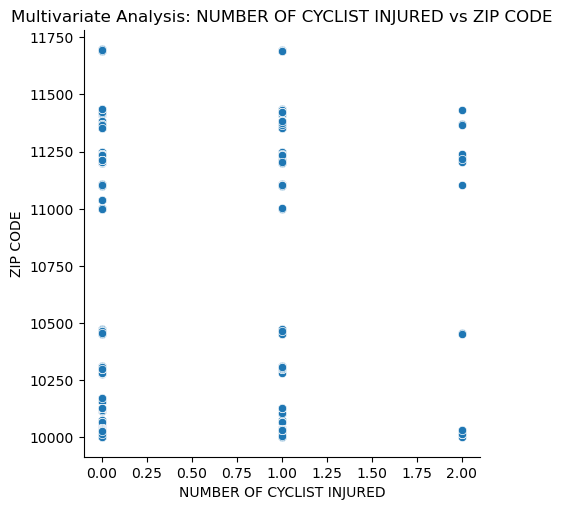

In [33]:
#Display a multivariate analysis plot for NUMBER OF CYCLIST INJURED vs ZIP CODE
sns.relplot(data=df, x='NUMBER OF CYCLIST INJURED', y='ZIP CODE')
plt.title('Multivariate Analysis: NUMBER OF CYCLIST INJURED vs ZIP CODE')
plt.show()

Observation: The number of cyclists injured are spread between ZIP CODE 10000 and 10500. And between 11000 and 11500.

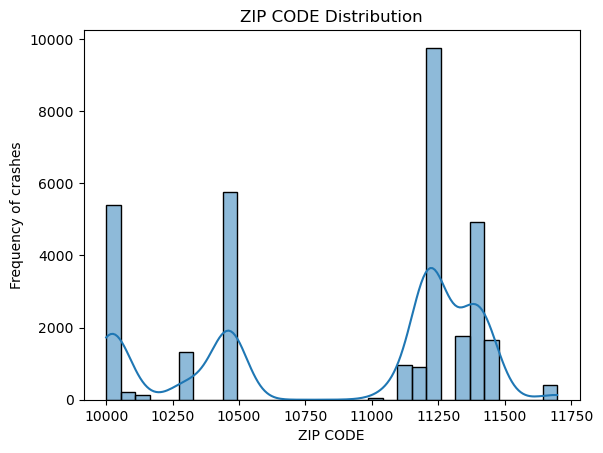

In [34]:
sns.histplot(data=df,x='ZIP CODE',kde=True)
plt.title('ZIP CODE Distribution')
plt.xlabel('ZIP CODE')
plt.ylabel('Frequency of crashes')
plt.show()

Observation: In the graphic above can be visualized that the ZIP CODEs close to 10000,10500, 11250 and 11400 concentrate more cases of vehicle crashes.

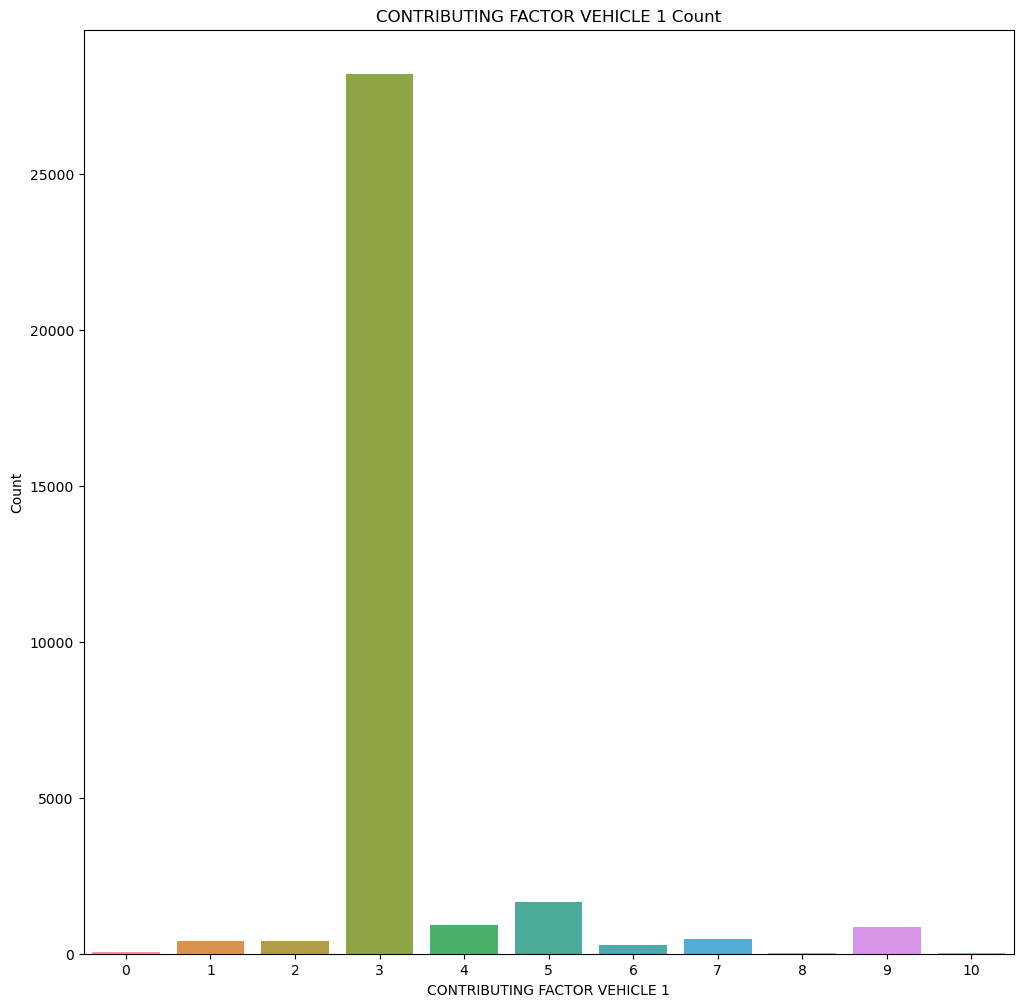

In [35]:
#Create a countplot for the VEHICLE TYPE CODE 1 column
plt.figure(figsize=(12,12))
sns.countplot(data=df, x='CONTRIBUTING FACTOR VEHICLE 1')
plt.title('CONTRIBUTING FACTOR VEHICLE 1 Count')
plt.xlabel('CONTRIBUTING FACTOR VEHICLE 1')
plt.ylabel('Count')
plt.show()

Observations: 
    In the graphic above can be visualized that the 4 main factors involving in a car crash are:
    
         3 - Inadequate driving behavior
         4 - Inappropriate Road conditions
         5 - Misbehavior by another driver
         9 - Use of alcohol or licit/illicit drugs

# 6 - Feature engineering

## 6.1 - Selection

In [36]:
df.corr(numeric_only=True)

,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
ZIP CODE,1.000000,0.008722,-0.010127,-0.030220,-0.010420,-0.055402,-0.010324,0.037384,-0.000872,-0.024316,0.059887,0.019066,0.010488,0.006812,-0.052497,-0.016007,-0.050802,-0.035429,-0.025219
NUMBER OF PERSONS INJURED,0.008722,1.000000,0.030556,0.238597,0.009387,0.175069,-0.005932,0.871842,0.036999,0.004058,-0.097373,-0.046077,-0.022650,-0.005714,-0.030265,-0.096177,-0.090586,-0.069232,-0.055840
NUMBER OF PERSONS KILLED,-0.010127,0.030556,1.000000,-0.005024,0.580878,-0.009921,0.201136,0.038471,0.753136,0.008297,0.004999,0.002922,0.001357,0.000790,0.002411,0.014334,-0.002111,-0.013830,-0.015298
NUMBER OF PEDESTRIANS INJURED,-0.030220,0.238597,-0.005024,1.000000,0.004153,-0.064313,-0.002701,-0.108890,-0.008185,-0.010842,0.108490,0.018208,0.009463,0.005506,0.072069,0.352603,0.079287,0.040953,0.019878
NUMBER OF PEDESTRIANS KILLED,-0.010420,0.009387,0.580878,0.004153,1.000000,-0.006131,-0.000239,0.011023,-0.000726,0.008473,0.006754,0.001806,0.000839,0.000488,0.010772,0.025868,0.000627,-0.008699,-0.019679
NUMBER OF CYCLIST INJURED,-0.055402,0.175069,-0.009921,-0.064313,-0.006131,1.000000,-0.002308,-0.098008,-0.006993,0.041887,-0.092323,0.004032,0.004544,0.004704,-0.117040,-0.277649,0.053346,0.032526,0.018313
NUMBER OF CYCLIST KILLED,-0.010324,-0.005932,0.201136,-0.002701,-0.000239,-0.002308,1.000000,-0.004108,-0.000273,0.007837,0.003784,0.000680,0.000316,0.000184,-0.008058,-0.002897,-0.007755,-0.026605,0.000943
NUMBER OF MOTORIST INJURED,0.037384,0.871842,0.038471,-0.108890,0.011023,-0.098008,-0.004108,1.000000,0.045100,-0.002451,-0.099243,-0.058362,-0.029965,-0.010266,-0.009490,-0.129406,-0.152213,-0.104372,-0.075372
NUMBER OF MOTORIST KILLED,-0.000872,0.036999,0.753136,-0.008185,-0.000726,-0.006993,-0.000273,0.045100,1.000000,0.000512,0.001287,0.002060,0.000957,0.000557,0.002398,-0.002165,-0.002301,-0.005107,-0.005702
CONTRIBUTING FACTOR VEHICLE 1,-0.024316,0.004058,0.008297,-0.010842,0.008473,0.041887,0.007837,-0.002451,0.000512,1.000000,-0.058134,-0.051597,-0.019006,-0.012432,-0.008355,-0.026562,-0.058695,-0.053429,-0.045431


In [37]:
# Visualizing correlation with the column "NUMBER OF PERSONS INJURED"
df.corr(numeric_only=True)["NUMBER OF PERSONS INJURED"].abs().sort_values(ascending=False)

NUMBER OF PERSONS INJURED        1.000000
NUMBER OF MOTORIST INJURED       0.871842
NUMBER OF PEDESTRIANS INJURED    0.238597
NUMBER OF CYCLIST INJURED        0.175069
CONTRIBUTING FACTOR VEHICLE 2    0.097373
VEHICLE TYPE CODE 2              0.096177
VEHICLE TYPE CODE 3              0.090586
VEHICLE TYPE CODE 4              0.069232
VEHICLE TYPE CODE 5              0.055840
CONTRIBUTING FACTOR VEHICLE 3    0.046077
NUMBER OF MOTORIST KILLED        0.036999
NUMBER OF PERSONS KILLED         0.030556
VEHICLE TYPE CODE 1              0.030265
CONTRIBUTING FACTOR VEHICLE 4    0.022650
NUMBER OF PEDESTRIANS KILLED     0.009387
ZIP CODE                         0.008722
NUMBER OF CYCLIST KILLED         0.005932
CONTRIBUTING FACTOR VEHICLE 5    0.005714
CONTRIBUTING FACTOR VEHICLE 1    0.004058
Name: NUMBER OF PERSONS INJURED, dtype: float64

In [38]:
#verifing the max values of "NUMBER OF PERSONS INJURED" to drop and prevent outliers
max_values = df["NUMBER OF PERSONS INJURED"].nlargest(10)
print(max_values)

5918     18.0
33103    14.0
27037    13.0
1932     10.0
513       9.0
5381      9.0
6211      9.0
6822      8.0
9394      8.0
18886     8.0
Name: NUMBER OF PERSONS INJURED, dtype: float64


In [39]:
# I made a decision to maintain only registers with less than 20 persons injured
df = df[df['NUMBER OF PERSONS INJURED'] < 10.0]


In [40]:
#creating target and features to be use in a pipeline 
target = df['NUMBER OF PERSONS INJURED']
features = df.drop(['NUMBER OF PERSONS INJURED','CRASH TIME','CRASH DATE'], axis=1)

In [41]:
# Selecting the best features, using k = 6 - to be used in the pipeline 
kbest = SelectKBest(score_func=f_regression, k=6) 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

kbest.fit_transform(X_train, y_train)
df_kbest = features.iloc[:,kbest.get_support()]
df_kbest.head()

,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3
0,0.0,0.0,0.0,4,3,9
1,0.0,0.0,0.0,10,9,9
2,0.0,0.0,0.0,10,9,9
3,0.0,0.0,1.0,10,6,9
4,0.0,0.0,0.0,10,9,9


In [42]:
# feature selector to be used in the pipeline
feature_selector = SelectFromModel(estimator=RandomForestRegressor(n_estimators=100))

# 6.2 - Scaling

In [43]:
df.head()

,CRASH DATE,CRASH TIME,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-01-01,1900-01-01 04:51:00,11212.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,4,6,4,2,3,3,9,9,7
1,2021-01-01,1900-01-01 16:14:00,11237.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,10,6,4,2,3,9,9,9,7
2,2021-01-01,1900-01-01 06:15:00,11222.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,10,6,4,2,3,9,9,9,7
3,2021-01-01,1900-01-01 17:25:00,10019.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4,10,6,4,2,3,6,9,9,7
4,2021-01-01,1900-01-01 00:25:00,11105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,10,6,4,2,3,9,9,9,7


In [44]:
rs = RobustScaler()
scaled_features = rs.fit_transform(df_kbest)

scaled_df3 = pd.DataFrame(scaled_features, columns=df_kbest.columns)
scaled_df3

,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3
0,0.0,0.0,0.0,-6.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.5,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
33276,0.0,0.0,0.0,0.0,1.0,0.0
33277,0.0,0.0,0.0,0.0,1.0,0.0
33278,0.0,0.0,1.0,0.0,0.0,-6.0
33279,0.0,0.0,0.0,0.0,0.0,0.0


# 7 - Cleaned and transformed Dataset

In [45]:
# Saving the cleaned dataset
df.to_csv('Dataset/Motor_Vehicle_Collisions_Cleaned.csv', index=False)

# 8 - Machine Learning pipeline implementation

# 8.1 - Using K-means with cluster k=4

In [46]:
df_kbest.head()

,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3
0,0.0,0.0,0.0,4,3,9
1,0.0,0.0,0.0,10,9,9
2,0.0,0.0,0.0,10,9,9
3,0.0,0.0,1.0,10,6,9
4,0.0,0.0,0.0,10,9,9


In [47]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),   
    ('kmeans', KMeans(n_clusters=4,n_init=10)) 
])


X = df_kbest[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED','CONTRIBUTING FACTOR VEHICLE 2']]  

pipeline.fit(X)


labels = pipeline.predict(X)


kmeans_model = pipeline.named_steps['kmeans']


center = kmeans_model.cluster_centers_

print(center)

[[-0.28453208 -0.24309426  0.01881256  0.39559015]
 [-0.27168335  4.06495687 -0.41041255 -0.37006203]
 [ 3.31234828 -0.23985122 -0.40366945  0.38368059]
 [-0.28453208 -0.24309426  0.33815911 -2.50354187]]


In [48]:
# Ploting the result of clustering

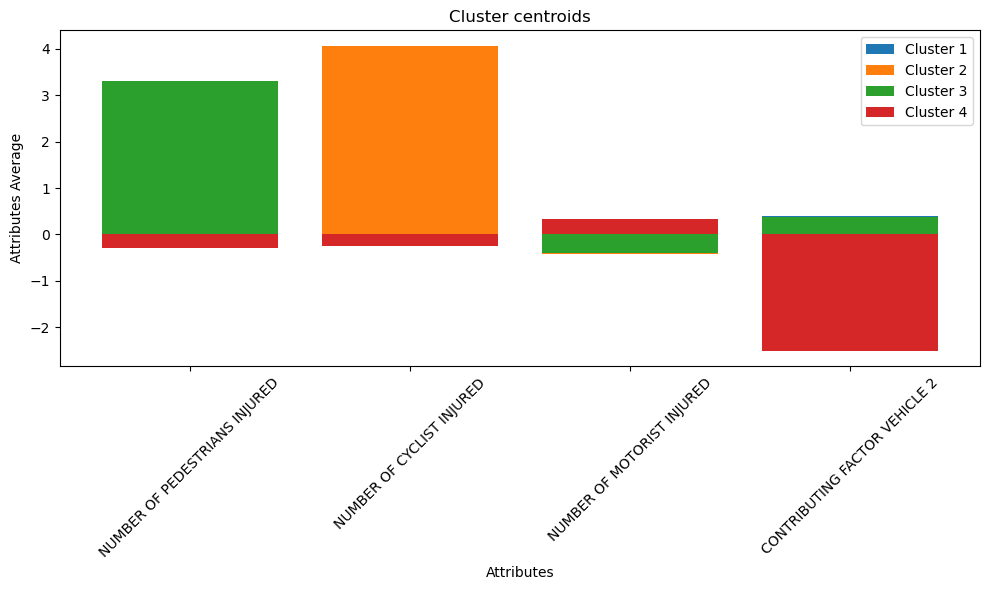

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))

attributes = ['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED','CONTRIBUTING FACTOR VEHICLE 2']

for i, centroid in enumerate(center):
    ax.bar(attributes, centroid, label=f'Cluster {i+1}')

ax.set_ylabel('Attributes Average')
ax.set_xlabel('Attributes')
ax.set_title('Cluster centroids')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8.2 - Using Random regression

In [50]:
# Making predictions with Random Forest Regressor
pipe = Pipeline([("scaler",RobustScaler()),("selector", feature_selector),
                 ("regressor", RandomForestRegressor())])
pipe.fit(X_train, y_train)
Y_pred = pipe.predict(X_test)

In [51]:
# Ploting the prediction of Persons injured

Text(0.5, 1.0, 'Random Regression')

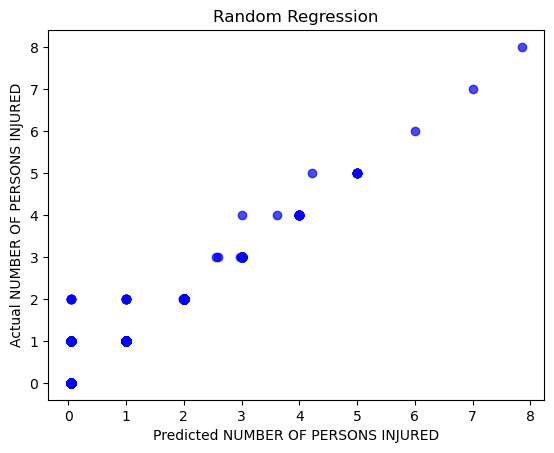

In [52]:
plt.scatter(Y_pred, y_test, alpha=.7, color='b') 
plt.xlabel('Predicted NUMBER OF PERSONS INJURED')
plt.ylabel('Actual NUMBER OF PERSONS INJURED')
plt.title('Random Regression')

# 9 - Report, error (and plot of) metrics, and results analysis

In [53]:
# Using metrics to calculate error
mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, Y_pred)

In [54]:
# Print metrics calculated
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 0.05
Mean Squared Error: 0.03
Root Mean Squared Error: 0.16
R-squared: 0.95


## Conclusion: 

The regression metric results appear to be satisfatory. They indicate that the regression model used (Random Forest Regressor) is making predictions with high accuracy in relation to the actual values. 

Summarizing:

Mean Absolute Error (MAE): 0.05
MAE measures the average of absolute errors between the model's predictions and the actual values. An MAE of 0.05 suggests that, on average, the model's predictions deviate only 0.05 units from the actual values. This indicates that the model is making predictions very close to the actual values.

Mean Squared Error (MSE): 0.03
MSE is the average of squared errors between the predictions and the actual values. An MSE of 0.03 indicates that individual errors are being significantly reduced (because they are squared), but on average, they are still minimal.

Root Mean Squared Error (RMSE): 0.16
RMSE is the square root of MSE and is a more interpretable error metric since it's on the same scale as the original values. An RMSE of 0.16 suggests that, on average, the model's predictions deviate by around 0.16 units from the actual values. This also indicates good performance.

R-squared (R²): 0.95
R-squared, also known as the coefficient of determination, measures the proportion of variability in the actual values that are captured by the model's predictions. An R² close to 1 (0.95 in your case) indicates that the model is explaining about 95% of the variation in the data, which is excellent. This suggests that the model is highly accurate in explaining variations in the data.

# 10 - Out-of-sample prediction

The machine learning was projected using information about crashes from 2021 until 2022. After the model is done, I run the code with the complete model with information about crashes since 2016 (Motor_Vehicle_Collisions_Complete.csv). 

The visualizations, graphics, and conclusion were in the report. In resume using the complete Dataset, the metrics show better results, as shown below:

            Mean Absolute Error: 0.01
            Mean Squared Error: 0.01
            Root Mean Squared Error: 0.08
            R-squared: 0.99

<!-- <class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 29 columns):
 Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH DATE                     1048574 non-null  object 
 1   CRASH TIME                     1048574 non-null  object 
 2   BOROUGH                        671899 non-null   object 
 3   ZIP CODE                       671715 non-null   float64
 4   LATITUDE                       973788 non-null   float64
 5   LONGITUDE                      973788 non-null   float64
 6   LOCATION                       973788 non-null   object 
 7   ON STREET NAME                 791563 non-null   object 
 8   CROSS STREET NAME              505581 non-null   object 
 9   OFF STREET NAME                255683 non-null   object 
 10  NUMBER OF PERSONS INJURED      1048557 non-null  float64
 11  NUMBER OF PERSONS KILLED       1048544 non-null  float64
 12  NUMBER OF PEDESTRIANS INJURED  1048574 non-null  int64  
 13  NUMBER OF PEDESTRIANS KILLED   1048574 non-null  int64  
 14  NUMBER OF CYCLIST INJURED      1048574 non-null  int64  
 15  NUMBER OF CYCLIST KILLED       1048574 non-null  int64  
 16  NUMBER OF MOTORIST INJURED     1048574 non-null  int64  
 17  NUMBER OF MOTORIST KILLED      1048574 non-null  int64  
 18  CONTRIBUTING FACTOR VEHICLE 1  1044825 non-null  object 
 19  CONTRIBUTING FACTOR VEHICLE 2  870117 non-null   object 
 20  CONTRIBUTING FACTOR VEHICLE 3  77587 non-null    object 
 21  CONTRIBUTING FACTOR VEHICLE 4  18049 non-null    object 
 22  CONTRIBUTING FACTOR VEHICLE 5  5037 non-null     object 
 23  COLLISION_ID                   1048574 non-null  int64  
 24  VEHICLE TYPE CODE 1            1039910 non-null  object 
 25  VEHICLE TYPE CODE 2            799626 non-null   object 
 26  VEHICLE TYPE CODE 3            73175 non-null    object 
 27  VEHICLE TYPE CODE 4            17147 non-null    object 
 28  VEHICLE TYPE CODE 5            4834 non-null     object 
dtypes: float64(5), int64(7), object(17)
memory usage: 232.0+ MB -->